**Importando bibliotecas**

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import random

**Criando base**

Nossos dados representam o raio de uma esfera. Ela tem uma distribuição uniforme contínuo -> $U[0;100]$.

In [ ]:
dados= {"Raio": [random.uniform(0.0,100) for x in range(50)]}
df= pd.DataFrame(dados)
df.head()

,Raio
0,10.475389
1,20.593219
2,52.120260
3,13.535324
4,3.047929


**Visualizando dados**

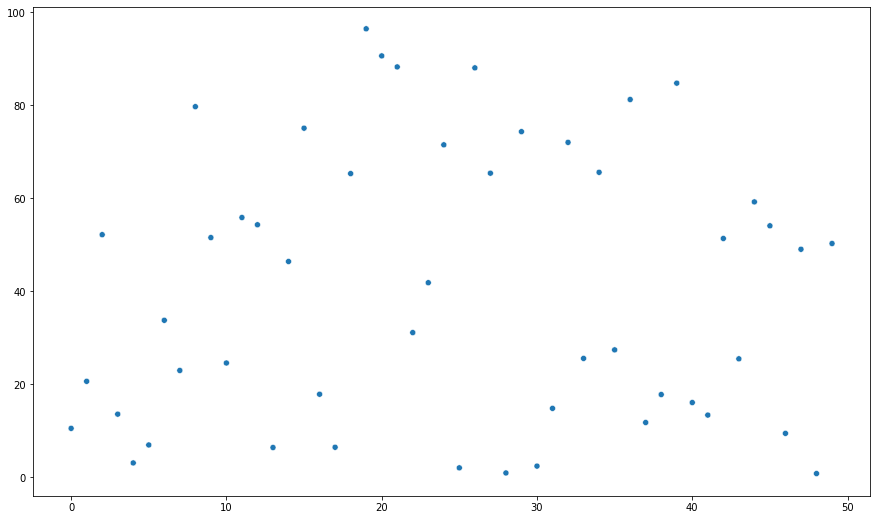

In [ ]:
plt.figure(figsize=(15,9))

sns.scatterplot(data= df, legend= False)
plt.show()

**Usando Sklearn: FunctionTransformer**
 
O método que vamos analisar é o FunctionTransformer, o seu objetivo é passar uma função matemática e retornará o resultados dos dados e podemos passar a função inversa para retornar seu resultado.
 
No exemplo, temos dados do comprimento do raio e temos duas funções: a primeria volume_esfera, nós retorna o volume da esfera com base no raio, e a segunda, temos a sua função inversa, com base num volume, qual será seu raio.

In [ ]:
def volume_esfera(raio):
  volume= (4/3)*(3.1416)*pow(raio,3)
  return(volume)

def raio_esfera(volume):
  raio= ((3/4)*(volume/3.1416))**(1/3)
  return(raio)

In [ ]:
from sklearn.preprocessing import FunctionTransformer

model= FunctionTransformer(func= volume_esfera, inverse_func= raio_esfera).fit(df['Raio'].to_numpy().reshape(1,-1))

df["Volume"]= model.transform(df["Raio"])
df["Raio_inv"]= model.inverse_transform(df["Volume"])

df.head(10)

,Raio,Volume,Raio_inv
0,10.475389,4.815043e+03,10.475389
1,20.593219,3.658157e+04,20.593219
2,52.120260,5.930746e+05,52.120260
3,13.535324,1.038713e+04,13.535324
4,3.047929,1.186053e+02,3.047929
5,6.911239,1.382793e+03,6.911239
6,33.711607,1.604826e+05,33.711607
7,22.923950,5.046125e+04,22.923950
8,79.639848,2.115831e+06,79.639848
9,51.494050,5.719536e+05,51.494050
